In [1]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [22]:
doubling_time=18
ncells1=200
tmax=7*doubling_time
ncells2=200

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


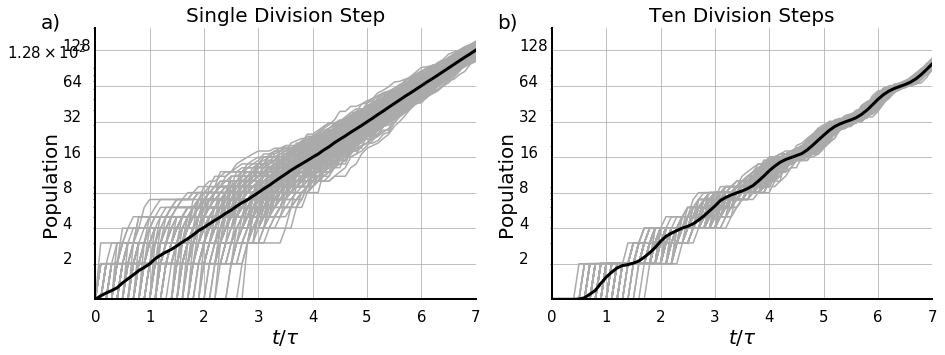

In [98]:
fig, ax = plt.subplots(1,2, figsize=(15,5),sharex=True,sharey=True)

data1=pd.read_csv("./SingleStep/data/data2Pop.csv")

smparr=data1.Sample.unique()
smparr.sort()
for smp in smparr:
    df=data1[data1.Sample==smp]
    tm,N=np.unique(df['Time'],return_counts=True)
    ax[0].plot(tm/doubling_time,N,c="#AAAAAA")
tm,N=np.unique(data1['Time'],return_counts=True)
ax[0].plot(tm/doubling_time,N/ncells1,lw=3,c='k')



data1=pd.read_csv("./TenSteps/data/data2Pop.csv")
smparr=data1.Sample.unique()
smparr.sort()
for smp in smparr:
    df=data1[data1.Sample==smp]
    tm,N=np.unique(df['Time'],return_counts=True)
    ax[1].plot(tm/doubling_time,N,c="#AAAAAA")
tm,N=np.unique(data1['Time'],return_counts=True)
ax[1].plot(tm/doubling_time,N/ncells2,lw=3,c='k')

ax[0].set_yscale('log')
#plt.ylabel("$Population$",size=20)
ax[0].set_xlabel(r"$t/\tau$",size=20)
ax[1].set_xlabel(r"$t/\tau$",size=20)
ax[0].set_ylim([0,200])
ax[0].set_xlim([0,tmax/doubling_time])
ax[0].set_title("Single Division Step",fontsize=20)
ax[1].set_title("Ten Division Steps",fontsize=20)
for i in [0,1]:
    taqui=np.arange(0,(tmax+1)/doubling_time,step=1)
    ax[i].set_xticks(np.array(taqui))
    taqui=2**np.arange(1,8,step=1)
    ax[i].set_yticks(np.array(taqui))
    ax[i].grid()
    ax[i].tick_params(axis='x', labelsize=15)
    ax[i].tick_params(axis='y', labelsize=15)
    for l in range(len(taqui)):
        ax[i].text(-.6,taqui[l],str(taqui[l]),fontsize=15)
    ax[i].text(-1,20,'Population',fontsize=20,rotation=90)
    for axis in ['bottom','left']:
        ax[i].spines[axis].set_linewidth(2)
        ax[i].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].tick_params(axis='both', width=0,length=6)
ax[0].text(-1,200,'a)',fontsize=20)
ax[1].text(-1,200,'b)',fontsize=20)
plt.savefig('./figures/Population.eps',bbox_inches='tight')
plt.savefig('./figures/Population.svg',bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


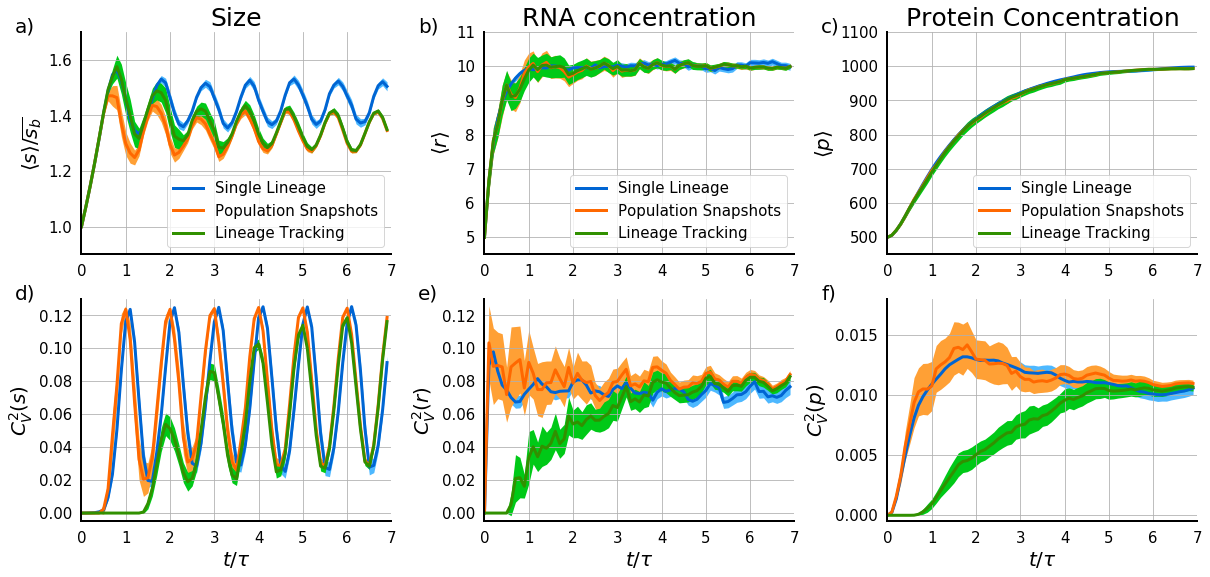

In [95]:
data=pd.read_csv("./TenSteps/data/GeneStatistics.csv")

fig, ax = plt.subplots(2,3, figsize=(20,9))
types=data.Type.unique()
fillcolors=['#4db8ff','#FFA035','#00C917']
linecolors=['#0065D3','#FF6800',"#319000"]
i=0
for tp in types:
    df=data[data.Type==tp]
    ax[0,0].plot(df.Time/doubling_time,df.MeanSz,lw=3,label=tp,c=linecolors[i])
    ax[0,0].fill_between(df.Time/doubling_time,df.MeanSz-df.ErrorMeanSz,df.MeanSz+df.ErrorMeanSz,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    ax[0,0].legend(fontsize=15,loc="lower right")
    
    ax[1,0].plot(df.Time/doubling_time,df.CV2Sz,lw=3,label=tp,c=linecolors[i])
    ax[1,0].fill_between(df.Time/doubling_time,df.CV2Sz-df.ErrorCV2Sz,df.CV2Sz+df.ErrorCV2Sz,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    
    ax[0,1].plot(df.Time/doubling_time,df.MeanRNA,lw=3,label=tp,c=linecolors[i])
    ax[0,1].fill_between(df.Time/doubling_time,df.MeanRNA-df.ErrorMeanRNA,df.MeanRNA+df.ErrorMeanRNA,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    ax[0,1].legend(fontsize=15,loc="lower right")
    
    ax[1,1].plot(df.Time/doubling_time,df.CV2RNA,lw=3,label=tp,c=linecolors[i])
    ax[1,1].fill_between(df.Time/doubling_time,df.CV2RNA-df.ErrorCV2RNA,df.CV2RNA+df.ErrorCV2RNA,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    
    ax[0,2].plot(df.Time/doubling_time,df.MeanProt,lw=3,label=tp,c=linecolors[i])
    ax[0,2].fill_between(df.Time/doubling_time,df.MeanProt-df.ErrorMeanProt,df.MeanProt+df.ErrorMeanProt,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    ax[0,2].legend(fontsize=15,loc="lower right")
    
    ax[1,2].plot(df.Time/doubling_time,df.CV2Prot,lw=3,label=tp,c=linecolors[i])
    ax[1,2].fill_between(df.Time/doubling_time,df.CV2Prot-df.ErrorCV2Prot,df.CV2Prot+df.ErrorCV2Prot,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    
    i+=1

ax[0,0].set_ylabel(r"$\langle s\rangle/\overline{s_b}$",size=20)
ax[0,1].set_ylabel(r"$\langle r\rangle$",size=20)
ax[0,2].set_ylabel(r"$\langle p\rangle$",size=20)

ax[1,0].set_ylabel("$C_V^2(s)$",size=20)
ax[1,1].set_ylabel("$C_V^2(r)$",size=20)
ax[1,2].set_ylabel("$C_V^2(p)$",size=20)

ax[1,0].set_xlabel(r"$t/\tau$",size=20)
ax[1,1].set_xlabel(r"$t/\tau$",size=20)
ax[1,2].set_xlabel(r"$t/\tau$",size=20)
#ax[0].set_ylim([1,1.7])
#ax[1].set_ylim([0,0.15])
for l in [0,1]:
    for m in [0,1,2]:
        ax[l,m].set_xlim([0,7])
        taqui=np.arange(0,7.5,step=1)
        ax[l,m].set_xticks(np.array(taqui))
        ax[l,m].grid()
        ax[l,m].tick_params(axis='x', labelsize=15)
        ax[l,m].tick_params(axis='y', labelsize=15)
        for axis in ['bottom','left']:
            ax[l,m].spines[axis].set_linewidth(2)
            ax[l,m].tick_params(axis='both', width=2,length=6)
        for axis in ['top','right']:
            ax[l,m].spines[axis].set_linewidth(0)
            ax[l,m].tick_params(axis='both', width=0,length=6)
plt.subplots_adjust(hspace=0.2,wspace=0.3)
ax[0,0].set_title('Size',fontsize=25)
ax[0,1].set_title('RNA concentration',fontsize=25)
ax[0,2].set_title('Protein Concentration',fontsize=25)

ax[0,0].set_ylim([0.9,1.7])
ax[0,0].text(-1.5,1.7,"a)",fontsize=20)
ax[0,1].set_ylim([4.5,11])
ax[0,1].text(-1.5,11,"b)",fontsize=20)
ax[0,2].set_ylim([450,1100])
ax[0,2].text(-1.5,1100,"c)",fontsize=20)

ax[1,0].set_ylim([-0.005,0.13])
ax[1,0].text(-1.5,0.13,"d)",fontsize=20)
ax[1,1].set_ylim([-0.005,0.13])
ax[1,1].text(-1.5,0.13,"e)",fontsize=20)
ax[1,2].set_ylim([-0.0005,0.018])
ax[1,2].text(-1.5,0.018,"f)",fontsize=20)
plt.savefig('./figures/TenStepsStatistics.eps',bbox_inches='tight')
plt.savefig('./figures/TenStepsStatistics.svg',bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


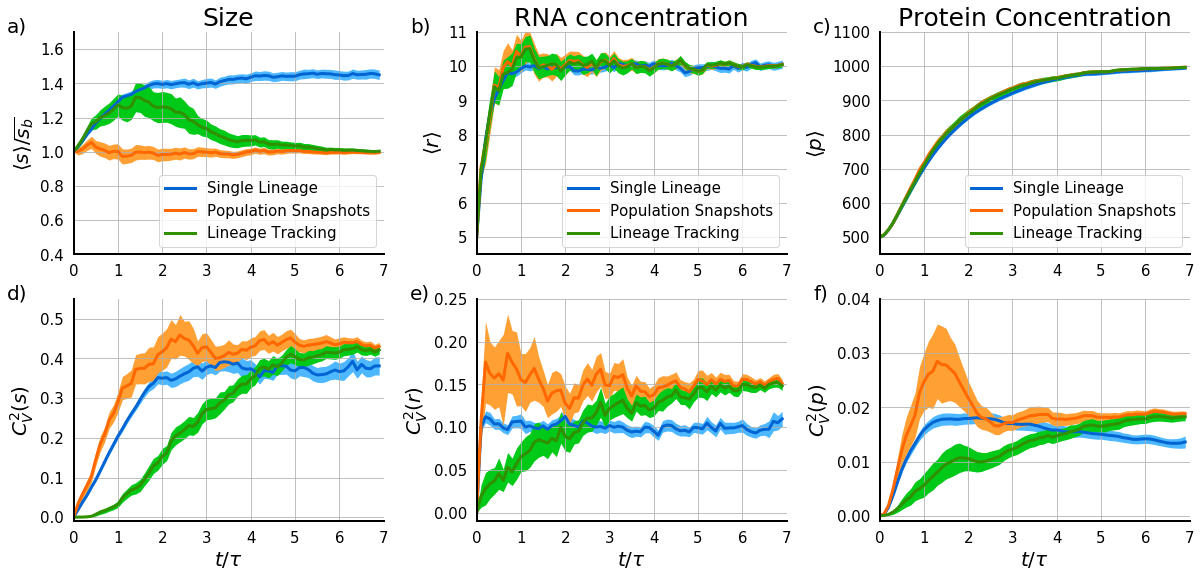

In [99]:
data=pd.read_csv("./SingleStep/data/GeneStatistics.csv")

fig, ax = plt.subplots(2,3, figsize=(20,9))
types=data.Type.unique()
fillcolors=['#4db8ff','#FFA035','#00C917']
linecolors=['#0065D3','#FF6800',"#319000"]
i=0
for tp in types:
    df=data[data.Type==tp]
    ax[0,0].plot(df.Time/doubling_time,df.MeanSz,lw=3,label=tp,c=linecolors[i])
    ax[0,0].fill_between(df.Time/doubling_time,df.MeanSz-df.ErrorMeanSz,df.MeanSz+df.ErrorMeanSz,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    ax[0,0].legend(fontsize=15,loc="lower right")
    
    ax[1,0].plot(df.Time/doubling_time,df.CV2Sz,lw=3,label=tp,c=linecolors[i])
    ax[1,0].fill_between(df.Time/doubling_time,df.CV2Sz-df.ErrorCV2Sz,df.CV2Sz+df.ErrorCV2Sz,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    
    ax[0,1].plot(df.Time/doubling_time,df.MeanRNA,lw=3,label=tp,c=linecolors[i])
    ax[0,1].fill_between(df.Time/doubling_time,df.MeanRNA-df.ErrorMeanRNA,df.MeanRNA+df.ErrorMeanRNA,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    ax[0,1].legend(fontsize=15,loc="lower right")
    
    ax[1,1].plot(df.Time/doubling_time,df.CV2RNA,lw=3,label=tp,c=linecolors[i])
    ax[1,1].fill_between(df.Time/doubling_time,df.CV2RNA-df.ErrorCV2RNA,df.CV2RNA+df.ErrorCV2RNA,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    
    ax[0,2].plot(df.Time/doubling_time,df.MeanProt,lw=3,label=tp,c=linecolors[i])
    ax[0,2].fill_between(df.Time/doubling_time,df.MeanProt-df.ErrorMeanProt,df.MeanProt+df.ErrorMeanProt,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    ax[0,2].legend(fontsize=15,loc="lower right")
    
    ax[1,2].plot(df.Time/doubling_time,df.CV2Prot,lw=3,label=tp,c=linecolors[i])
    ax[1,2].fill_between(df.Time/doubling_time,df.CV2Prot-df.ErrorCV2Prot,df.CV2Prot+df.ErrorCV2Prot,
                 alpha=1, edgecolor=fillcolors[i], facecolor=fillcolors[i],linewidth=0,label='_nolegend_')
    
    i+=1

ax[0,0].set_ylabel(r"$\langle s\rangle/\overline{s_b}$",size=20)
ax[0,1].set_ylabel(r"$\langle r\rangle$",size=20)
ax[0,2].set_ylabel(r"$\langle p\rangle$",size=20)

ax[1,0].set_ylabel("$C_V^2(s)$",size=20)
ax[1,1].set_ylabel("$C_V^2(r)$",size=20)
ax[1,2].set_ylabel("$C_V^2(p)$",size=20)

ax[1,0].set_xlabel(r"$t/\tau$",size=20)
ax[1,1].set_xlabel(r"$t/\tau$",size=20)
ax[1,2].set_xlabel(r"$t/\tau$",size=20)
#ax[0].set_ylim([1,1.7])
#ax[1].set_ylim([0,0.15])
for l in [0,1]:
    for m in [0,1,2]:
        ax[l,m].set_xlim([0,7])
        taqui=np.arange(0,7.5,step=1)
        ax[l,m].set_xticks(np.array(taqui))
        ax[l,m].grid()
        ax[l,m].tick_params(axis='x', labelsize=15)
        ax[l,m].tick_params(axis='y', labelsize=15)
        for axis in ['bottom','left']:
            ax[l,m].spines[axis].set_linewidth(2)
            ax[l,m].tick_params(axis='both', width=2,length=6)
        for axis in ['top','right']:
            ax[l,m].spines[axis].set_linewidth(0)
            ax[l,m].tick_params(axis='both', width=0,length=6)
plt.subplots_adjust(hspace=0.2,wspace=0.3)
ax[0,0].set_title('Size',fontsize=25)
ax[0,1].set_title('RNA concentration',fontsize=25)
ax[0,2].set_title('Protein Concentration',fontsize=25)


ax[0,0].set_ylim([0.4,1.7])
ax[0,0].text(-1.5,1.7,"a)",fontsize=20)
ax[0,1].set_ylim([4.5,11])
ax[0,1].text(-1.5,11,"b)",fontsize=20)
ax[0,2].set_ylim([450,1100])
ax[0,2].text(-1.5,1100,"c)",fontsize=20)

ax[1,0].set_ylim([-0.01,0.55])
ax[1,0].text(-1.5,0.55,"d)",fontsize=20)
ax[1,1].set_ylim([-0.01,0.25])
ax[1,1].text(-1.5,0.25,"e)",fontsize=20)
ax[1,2].set_ylim([-0.001,0.04])
ax[1,2].text(-1.5,0.04,"f)",fontsize=20)
plt.savefig('./figures/SingleStepStatistics.eps',bbox_inches='tight')
plt.savefig('./figures/SingleStepStatistics.svg',bbox_inches='tight')